# Synthetic gravity data

This code calculates the gravity disturbance produced by a synthetic body. The synthetic data are calculated by using the open-source Python toolkit for geophysical modeling and inversion [Fatiando a Terra](http://www.fatiando.org/).

### Import the required stuff

In [1]:
# Set PySide compatible APIs
import sip
sip.setapi('QString', 2)
sip.setapi('QVariant', 2)

In [2]:
#comment this command if you want to create a new model
#%matplotlib inline

In [3]:
import numpy as np
import cPickle as pickle
from IPython.display import Image as img
from fatiando import mesher, gridder
from fatiando.gravmag import polyprism
from fatiando.vis import mpl, myv
import matplotlib.pyplot as plt

/home/vanderlei/Documents/fatiando/fatiando/vis/mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
/home/vanderlei/Documents/fatiando/fatiando/vis/myv.py:53: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


### Create a synthetic body

The synthetic body is formed by four [polygonal prisms](http://www.fatiando.org/api/mesher.html#fatiando.mesher.PolygonalPrism). These prisms are vertically juxtaposed, the top of the shallowest prism is at 100 m, the bottom of the deepest prism is at 2100 m and the density of all prisms is 500 km/cm<sup>3</sup>. The x, y, and z axes of the Cartesian coordinate system point, respectively, to North, East and to depth.

In [4]:
bounds = [-10000, 10000, -10000, 10000, 0, 5000]
area = bounds[:4]
depths = [100, 600, 1100, 1600, 2100]

In [5]:
#change this cell from `Raw NBConvert` to `Code` if you want to load a model
#by using the Python pickle module (https://docs.python.org/2/library/pickle.html)
with open('model.pickle') as f:
        model = pickle.load(f)

### Calculate the gravity disturbance

The synthetic gravity disturbance is calculated at a constant z<sub>0</sub> = -100 m, on a regular grid of 201 $\times$ 40 points along, respectively, the x and y axes of the Cartesian coordinate system.

In [6]:
# grid of points (xp, yp, zp) on which the gravity disturbance is calculated
shape = (141, 25)
z0 = -100
xp, yp, zp = gridder.regular(area, shape, z=z0)

dx, dy = gridder.spacing(area, shape)

# gravity disturbance (in mGal)
gz = polyprism.gz(xp, yp, zp, model)

In [7]:
print 'dx = %.5f \ndy = %.5f' % (dx, dy) 

dx = 142.85714 
dy = 833.33333


In [8]:
#Save the synthetic gravity disturbance in a txt file
header = """# Noise-free gravity disturbance calculated at z = {z} m, 
#on a regular grid of points
# shape (nx, ny): {shape}
# area [x1, x2, y1, y2]: {area}
# spacing (dx, dy): {spacing}
# x (m)    y (m)    z (m)    gravity disturbance (mGal)
""".format(z=z0, shape=shape, area=area, spacing=(dx, dy))
file_name = 'gravity_disturbance.txt'
with open(file_name, 'w') as f:
    f.write(header)
    np.savetxt(f, zip(xp, yp, zp, gz), fmt='%.5f')

In [9]:
#Save the synthetic gravity disturbance in a txt file
profile = (xp == 0.)
header = """# Noise-free gravity disturbance calculated at z = {z} m, 
#on the profile x = 0 m
# x (m)    y (m)    z (m)    gravity disturbance (mGal)
""".format(z=z0)
file_name = 'gravity_disturbance_profile.txt'
with open(file_name, 'w') as f:
    f.write(header)
    np.savetxt(f, zip(xp[profile], yp[profile], zp[profile], gz[profile]), fmt='%.5f')

### Plot the synthetic data

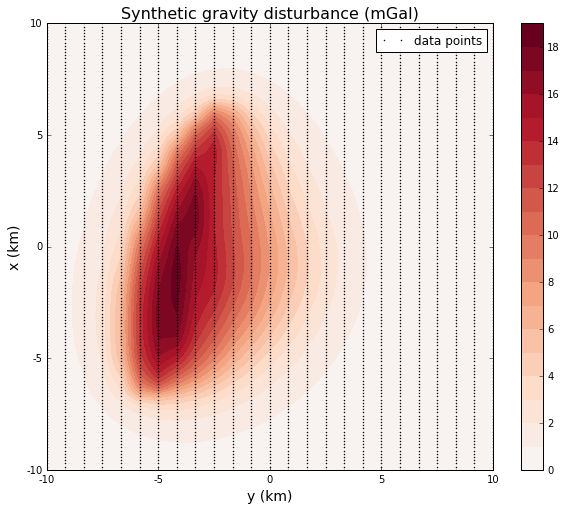

In [10]:
ranges = np.max(np.abs([np.min(gz), np.max(gz)]))
plt.figure(figsize=(10,8))
plt.axis('scaled')
plt.title("Synthetic gravity disturbance (mGal)", fontsize=16)
mpl.contourf(yp, xp, gz, shape, 20, cmap=plt.get_cmap('RdBu_r'),
            vmin=-ranges, vmax=ranges)
plt.colorbar()
plt.plot(yp, xp, '.k', markersize=2, label='data points')
plt.xlabel('y (km)', fontsize=14)
plt.ylabel('x (km)', fontsize=14)
mpl.set_area(area)
plt.legend(loc='upper right')
mpl.m2km()
plt.savefig('map.png')
plt.show()

Profile at x = 0 m

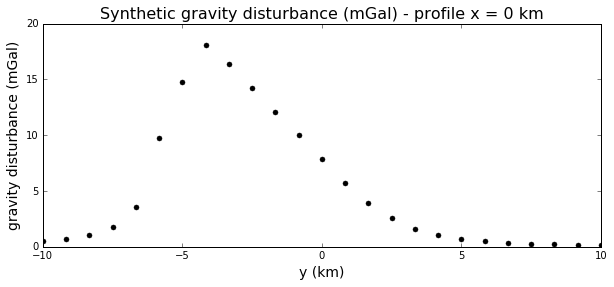

In [11]:
plt.figure(figsize=(10,4))
plt.title("Synthetic gravity disturbance (mGal) - profile x = 0 km", fontsize=16)
plt.plot(0.001*yp[profile], gz[profile], '.k', markersize=10)
plt.xlabel('y (km)', fontsize=14)
plt.ylabel('gravity disturbance (mGal)', fontsize=14)
plt.xlim(0.001*area[2], 0.001*area[3])
plt.savefig('profile.png')
plt.show()

### Plot the synthetic body

In [12]:
# Show the model
scene=myv.figure(size=(600,500))
myv.polyprisms(model, 'density')
myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])

scene.scene.camera.position = [-45893.530845938621, -15145.201752891464, -25039.48539632967]
scene.scene.camera.focal_point = [-444.56066945604118, -2065.8995815899721, 1099.9999999999832]
scene.scene.camera.view_angle = 30.0
scene.scene.camera.view_up = [0.48341530978694358, 0.064881785059688557, -0.87298338599944825]
scene.scene.camera.clipping_range = [31071.114118358404, 86583.208366893625]
scene.scene.camera.compute_view_plane_normal()
scene.scene.render()

myv.savefig('model.png')
myv.show()

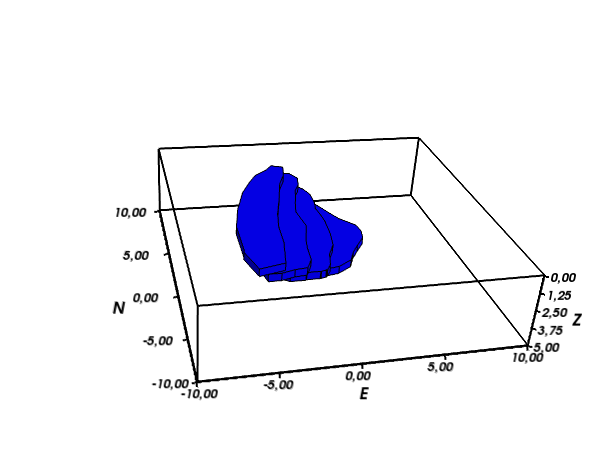

In [13]:
img('model.png')